<a href="https://colab.research.google.com/github/aqz84167/AI-and-Security/blob/master/20181031/1031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras

In [7]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 78s 0us/step


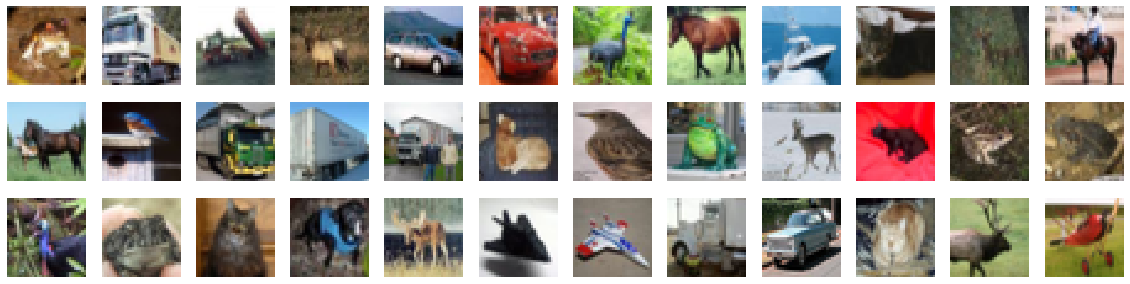

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [10]:
from keras.utils import np_utils

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)
datagen_valid.fit(x_valid)

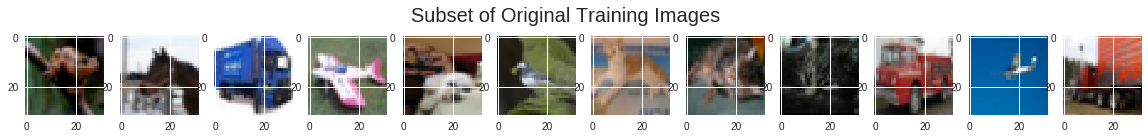

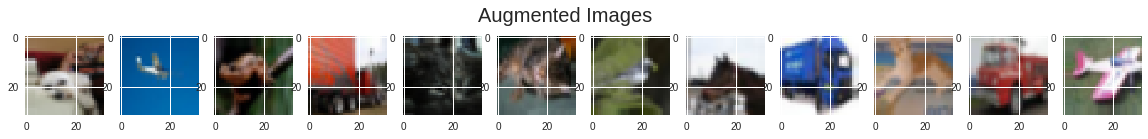

In [12]:
import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, 
                 padding='same', activation='relu', 
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, 
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, 
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)          0         
__________

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [15]:
from keras.callbacks import ModelCheckpoint   

batch_size = 128
epochs = 10

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(x_valid, y_valid, batch_size=batch_size),
                    validation_steps=x_valid.shape[0] // batch_size)

Epoch 1/10
 - 60s - loss: 1.8268 - acc: 0.3378 - val_loss: 1.5304 - val_acc: 0.4539

Epoch 00001: val_loss improved from inf to 1.53044, saving model to aug_model.weights.best.hdf5
Epoch 2/10
 - 59s - loss: 1.5528 - acc: 0.4394 - val_loss: 1.4525 - val_acc: 0.4762

Epoch 00002: val_loss improved from 1.53044 to 1.45250, saving model to aug_model.weights.best.hdf5
Epoch 3/10
 - 61s - loss: 1.4486 - acc: 0.4795 - val_loss: 1.3242 - val_acc: 0.5304

Epoch 00003: val_loss improved from 1.45250 to 1.32419, saving model to aug_model.weights.best.hdf5
Epoch 4/10
 - 63s - loss: 1.3752 - acc: 0.5080 - val_loss: 1.2830 - val_acc: 0.5521

Epoch 00004: val_loss improved from 1.32419 to 1.28299, saving model to aug_model.weights.best.hdf5
Epoch 5/10
 - 60s - loss: 1.3208 - acc: 0.5255 - val_loss: 1.1813 - val_acc: 0.5773

Epoch 00005: val_loss improved from 1.28299 to 1.18129, saving model to aug_model.weights.best.hdf5
Epoch 6/10
 - 60s - loss: 1.2724 - acc: 0.5453 - val_loss: 1.1765 - val_acc: 0.

11493376/11490434 [==============================] - 1s 0us/step


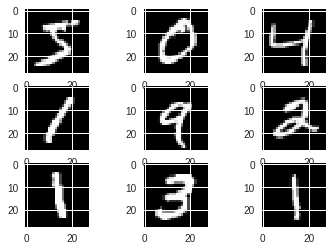

In [16]:
from keras.datasets import mnist
from matplotlib import pyplot
#loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#creating a grid of 3x3 images
for i in range(0, 9):
 pyplot.subplot(330 + 1 + i)
 pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
#Displaying the plot
pyplot.show()